In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score



In [5]:
#We shall begin by importing the 2 US bureau dataframes from each year that we are concerned with:

df1 = pd.read_excel("/Users/jacob/Documents/4YP data/US_BureaOfLaborStatistics/annualstats/national_M2019_dl.xlsx")
df2 = pd.read_excel("/Users/jacob/Documents/4YP data/US_BureaOfLaborStatistics/annualstats/national_M2014_dl.xlsx")


In [6]:
#We shall now drop the unimportant columns:

df1 = df1[["occ_code","tot_emp"]]
df1.columns= df1.columns.str.upper()
#df1 = df1.rename(columns={"occ_code": "OCC_CODE", "occ_title": "OCC_TITLE", "tot_emp": "TOT_EMP"}) #ensure consistency of labels
df2 = df2[["OCC_CODE","TOT_EMP"]]


#Now add a holder column for the data to be added to df1:

df1["TOT_EMP2"]=np.nan
df1.head()

,OCC_CODE,TOT_EMP,TOT_EMP2
0,00-0000,146875480,NaN
1,11-0000,8054120,NaN
2,11-1000,2658440,NaN
3,11-1010,205890,NaN
4,11-1011,205890,NaN


In [4]:
''' IGNORE ME '''

#Now we drop duplicate rows on both dataframes:

df1 = df1.drop_duplicates(subset = ["OCC_CODE"],keep="first")
df1 = df1.drop_duplicates(subset = ["TOT_EMP"],keep="first")
df2 = df2.drop_duplicates(subset = ["OCC_CODE"],keep="first")
df2 = df2.drop_duplicates(subset = ["TOT_EMP"],keep="first")

df1.reset_index(drop=True,inplace=True)
df2.reset_index(drop=True,inplace=True)

In [7]:
df1 = df1.groupby('OCC_CODE').median().reset_index()
df2 = df2.groupby('OCC_CODE').median().reset_index()

In [8]:
#We shall now focus on concatenating these dataframes

def concat_data(a,b,key):
    my_list = list(b["OCC_CODE"])
    for i in range(0,len(my_list)):
        if my_list[i] in list(a["OCC_CODE"]) == True:
            a.loc[a["OCC_CODE"] == my_list[i],"TOT_EMP2"] = list(b.loc[b["OCC_CODE"] == my_list[i],key])
        else:
            pass
    return a

concat_data(df1,df2,"TOT_EMP")

,OCC_CODE,TOT_EMP,TOT_EMP2
0,00-0000,146875480,NaN
1,11-0000,8054120,NaN
2,11-1000,2658440,NaN
3,11-1010,205890,NaN
4,11-1011,205890,NaN
...,...,...,...
1311,53-7081,121330,NaN
1312,53-7120,11620,NaN
1313,53-7121,11620,NaN
1314,53-7190,28240,NaN


In [9]:
my_list = list(df1["OCC_CODE"])

for i in range(0,len(my_list)):
    if my_list[i] in list(df2["OCC_CODE"]):
        df1.loc[df1["OCC_CODE"] == my_list[i],"TOT_EMP2"] = df2.loc[df2["OCC_CODE"] == my_list[i],"TOT_EMP"].values[0]

df1.head()

,OCC_CODE,TOT_EMP,TOT_EMP2
0,00-0000,146875480,135128260.0
1,11-0000,8054120,6741640.0
2,11-1000,2658440,2351130.0
3,11-1010,205890,246240.0
4,11-1011,205890,246240.0


In [ ]:
df1.info()

In [10]:
df1.dropna(inplace=True)
df1["CHANGE_EMP"] = df1["TOT_EMP"] - df1["TOT_EMP2"]
df1.head()

,OCC_CODE,TOT_EMP,TOT_EMP2,CHANGE_EMP
0,00-0000,146875480,135128260.0,11747220.0
1,11-0000,8054120,6741640.0,1312480.0
2,11-1000,2658440,2351130.0,307310.0
3,11-1010,205890,246240.0,-40350.0
4,11-1011,205890,246240.0,-40350.0


In [11]:
#Now lets work on adding the skill values:

df3 = pd.read_csv("/Users/jacob/Documents/4YP data/ONET_18-10-21/test.csv")

In [12]:
df3 = df3.drop(columns=['Title', 'Auto label value'])
df3.head()

,O*NET-SOC Code,Reading Comprehension,Active Listening,Writing,Speaking,Mathematics,Science,Critical Thinking,Active Learning,Learning Strategies,...,Troubleshooting,Repairing,Quality Control Analysis,Judgment and Decision Making,Systems Analysis,Systems Evaluation,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources
0,11-1011.00,4.75,4.88,4.38,4.88,3.62,1.12,4.75,4.75,3.88,...,0.00,0.0,1.00,5.75,5.38,5.12,4.75,5.50,4.75,5.38
1,11-1011.03,4.25,4.00,4.25,4.12,3.12,1.88,4.12,3.88,3.75,...,0.00,0.0,1.50,4.00,4.00,4.00,3.88,3.12,2.62,4.00
2,11-1021.00,4.00,4.00,3.88,4.00,2.50,1.12,4.00,3.62,3.25,...,1.38,0.0,2.12,3.75,3.00,3.12,3.75,3.38,3.25,3.88
3,11-2011.00,4.00,4.12,3.88,4.12,3.25,0.62,4.12,4.12,3.25,...,0.00,0.0,1.00,4.00,3.12,3.75,3.88,3.62,2.62,3.88
4,11-2021.00,4.25,4.12,3.88,4.12,3.12,1.50,4.25,4.12,3.50,...,0.00,0.0,1.38,4.00,3.75,3.75,3.75,3.75,2.75,3.88


In [ ]:
df3.info()

In [13]:
def title_set(my_string):
    my_output = my_string[:-3]
    return my_output

df3.iloc[:,0] = df3.iloc[:,0].apply(title_set)

df3 = df3.groupby('O*NET-SOC Code').median().reset_index()

df3.head()
#title_set("11-1011.00")

,O*NET-SOC Code,Reading Comprehension,Active Listening,Writing,Speaking,Mathematics,Science,Critical Thinking,Active Learning,Learning Strategies,...,Troubleshooting,Repairing,Quality Control Analysis,Judgment and Decision Making,Systems Analysis,Systems Evaluation,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources
0,11-1011,4.50,4.44,4.315,4.50,3.37,1.50,4.435,4.315,3.815,...,0.00,0.0,1.25,4.875,4.69,4.56,4.315,4.31,3.685,4.69
1,11-1021,4.00,4.00,3.880,4.00,2.50,1.12,4.000,3.620,3.250,...,1.38,0.0,2.12,3.750,3.00,3.12,3.750,3.38,3.250,3.88
2,11-2011,4.00,4.12,3.880,4.12,3.25,0.62,4.120,4.120,3.250,...,0.00,0.0,1.00,4.000,3.12,3.75,3.880,3.62,2.620,3.88
3,11-2021,4.25,4.12,3.880,4.12,3.12,1.50,4.250,4.120,3.500,...,0.00,0.0,1.38,4.000,3.75,3.75,3.750,3.75,2.750,3.88
4,11-2022,4.00,4.00,4.000,4.12,3.25,0.62,4.000,3.880,3.750,...,0.00,0.0,1.38,4.000,3.75,3.88,3.880,3.62,3.000,4.00


In [ ]:
#We now have got to deal with duplicate SOC codes

df3.info()

In [14]:
# We are all setup to concatenate employment change to each of the skill variables!

df3["Change in Employment"] = np.nan

my_list = list(df3["O*NET-SOC Code"])

for i in range(0,len(my_list)):
    if my_list[i] in list(df1["OCC_CODE"]):
        df3.loc[df3["O*NET-SOC Code"] == my_list[i],"Change in Employment"] = df1.loc[df1["OCC_CODE"] == my_list[i],"CHANGE_EMP"].values[0]

df3 = df3.dropna(subset=['Change in Employment'])
df3.head()

,O*NET-SOC Code,Reading Comprehension,Active Listening,Writing,Speaking,Mathematics,Science,Critical Thinking,Active Learning,Learning Strategies,...,Repairing,Quality Control Analysis,Judgment and Decision Making,Systems Analysis,Systems Evaluation,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources,Change in Employment
0,11-1011,4.50,4.44,4.315,4.50,3.37,1.50,4.435,4.315,3.815,...,0.0,1.25,4.875,4.69,4.56,4.315,4.31,3.685,4.69,-40350.0
1,11-1021,4.00,4.00,3.880,4.00,2.50,1.12,4.000,3.620,3.250,...,0.0,2.12,3.750,3.00,3.12,3.750,3.38,3.250,3.88,350410.0
2,11-2011,4.00,4.12,3.880,4.12,3.25,0.62,4.120,4.120,3.250,...,0.0,1.00,4.000,3.12,3.75,3.880,3.62,2.620,3.88,-4240.0
3,11-2021,4.25,4.12,3.880,4.12,3.12,1.50,4.250,4.120,3.500,...,0.0,1.38,4.000,3.75,3.75,3.750,3.75,2.750,3.88,79190.0
4,11-2022,4.00,4.00,4.000,4.12,3.25,0.62,4.000,3.880,3.750,...,0.0,1.38,4.000,3.75,3.88,3.880,3.62,3.000,4.00,43680.0


In [ ]:
df3.info()

In [ ]:
df3.to_csv("regressordata.csv",index=False)

In [15]:
#Lets now create a dataset with removed outliers:


Q1 = df3["Change in Employment"].quantile(0.25)
Q3 = df3["Change in Employment"].quantile(0.75)
IQR = Q3 - Q1
df4 = df3[np.abs(df3["Change in Employment"]-df3["Change in Employment"].median()) <= 1.5*IQR]

In [ ]:
df4.info()

In [ ]:
df4.to_csv("regressordata2.csv",index=False)

In [23]:
r2_score(df4["Mathematics"],df4["Change in Employment"])

-47707004.165369175

In [22]:
df4.columns

Index(['O*NET-SOC Code', 'Reading Comprehension', 'Active Listening',
       'Writing', 'Speaking', 'Mathematics', 'Science', 'Critical Thinking',
       'Active Learning', 'Learning Strategies', 'Monitoring',
       'Social Perceptiveness', 'Coordination', 'Persuasion', 'Negotiation',
       'Instructing', 'Service Orientation', 'Complex Problem Solving',
       'Operations Analysis', 'Technology Design', 'Equipment Selection',
       'Installation', 'Programming', 'Operations Monitoring',
       'Operation and Control', 'Equipment Maintenance', 'Troubleshooting',
       'Repairing', 'Quality Control Analysis', 'Judgment and Decision Making',
       'Systems Analysis', 'Systems Evaluation', 'Time Management',
       'Management of Financial Resources', 'Management of Material Resources',
       'Management of Personnel Resources', 'Change in Employment'],
      dtype='object')

### For the linear regression, we can just go from here:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("regressordata2.csv")
df.head()

,O*NET-SOC Code,Reading Comprehension,Active Listening,Writing,Speaking,Mathematics,Science,Critical Thinking,Active Learning,Learning Strategies,...,Repairing,Quality Control Analysis,Judgment and Decision Making,Systems Analysis,Systems Evaluation,Time Management,Management of Financial Resources,Management of Material Resources,Management of Personnel Resources,Change in Employment
0,11-2011,4.00,4.12,3.88,4.12,3.25,0.62,4.12,4.12,3.25,...,0.0,1.000,4.00,3.12,3.750,3.88,3.62,2.620,3.880,-4240.0
1,11-3051,4.06,3.94,3.75,4.00,3.44,2.50,4.00,3.62,3.50,...,2.5,3.315,3.88,3.56,3.625,3.75,3.50,3.315,3.815,18590.0
2,11-3061,3.75,4.00,4.00,3.88,3.38,0.25,4.00,3.88,3.62,...,0.0,1.880,3.75,3.62,3.620,3.88,3.88,3.750,4.000,1260.0
3,11-3111,4.00,4.12,4.00,4.00,2.88,0.25,4.00,3.75,3.00,...,0.0,0.750,4.00,3.88,3.880,3.88,3.62,2.000,3.500,520.0
4,11-3131,4.00,4.00,4.00,4.75,3.00,0.88,4.00,4.25,5.25,...,0.0,2.120,4.00,3.88,4.000,4.00,3.88,3.000,4.120,8640.0


In [11]:
#Begin by getting a plot for Service Orientation:

x = np.array(df["Service Orientation"]).reshape(-1, 1)
y = np.array(df["Change in Employment"]).reshape(-1, 1)
reg = LinearRegression().fit(x, y)

y_pred = reg.predict(x)

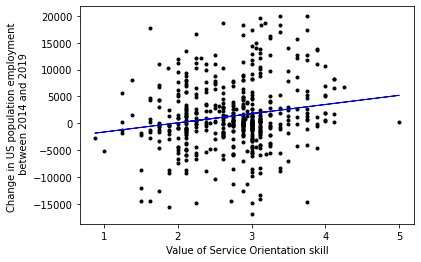

In [12]:
%matplotlib inline

fig = plt.figure()
plt.scatter(x, y,marker='.', color="black")
plt.plot(x, y_pred, color="blue", linewidth=1)
plt.xlabel("Value of Service Orientation skill")
plt.ylabel("Change in US population employment \n between 2014 and 2019")
#plt.savefig("ServiceOrientationEmpirical.jpg",bbox_inches='tight')
#plt.show()
plt.autoscale()
#fig.savefig('ServiceOrientationEmpirical.png')
fig.savefig('ServiceOrientationEmpirical.png',bbox_inches='tight',dpi=1000)
plt.show()

In [4]:
plt.show()
plt.savefig("ServiceOrientationEmpirical.pdf")


<Figure size 432x288 with 0 Axes>

In [3]:
#Lets now try and generate a table for all of the different features:

#First create an empty dataframe:
columns = df.columns
skills = columns[1:-1]
df2 = pd.DataFrame({"Skill": skills}, index = None)
df2["r"] = np.NaN
df2

,Skill,r
0,Reading Comprehension,NaN
1,Active Listening,NaN
2,Writing,NaN
3,Speaking,NaN
4,Mathematics,NaN
5,Science,NaN
6,Critical Thinking,NaN
7,Active Learning,NaN
8,Learning Strategies,NaN
9,Monitoring,NaN


In [4]:

y = np.array(df["Change in Employment"]).reshape(-1, 1)
for i in skills:
    x = np.array(df[i]).reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    df2.loc[df2["Skill"]==i, 'r'] = reg.coef_

df2    

,Skill,r
0,Reading Comprehension,-3.120318
1,Active Listening,173.820715
2,Writing,-176.845349
3,Speaking,71.731214
4,Mathematics,-121.576648
5,Science,100.217538
6,Critical Thinking,653.697625
7,Active Learning,202.739861
8,Learning Strategies,18.511219
9,Monitoring,380.406692


In [5]:
df2.sort_values("r",ascending = False,inplace=True)
df2

,Skill,r
15,Service Orientation,1709.144494
11,Coordination,1262.699277
33,Management of Material Resources,1161.709428
12,Persuasion,1116.478859
32,Management of Financial Resources,1060.464323
10,Social Perceptiveness,998.890176
13,Negotiation,949.981477
31,Time Management,860.092562
34,Management of Personnel Resources,730.192371
6,Critical Thinking,653.697625


In [8]:
df2.to_csv("empirical_correlations.csv",index=False)

In [6]:
#Why am I doing this? Surely we can do multivariable LR:

Xdf = df.drop(['O*NET-SOC Code', 'Change in Employment'], axis=1)
X = np.array(Xdf)
reg = LinearRegression().fit(X, y)
reg.coef_


array([[  766.59387845, -1858.94038227, -2895.80731315,  -363.99232025,
         -617.49463473,   720.4252205 ,  4685.48185774,  -410.86589775,
         -449.23742437, -1323.44445167,   526.40053201,  -446.58302466,
         1077.41746866,  -670.28825359,   390.06428193,  1638.9356911 ,
          555.56498144,  -572.10721469,  -697.4875058 ,   403.02104323,
          312.70979525, -2057.29579914,   241.84556556,  -634.52669539,
         1137.73623837,  -832.70257868, -1236.43330503,   940.92494628,
          509.74304909,   352.23700801,   199.78530226,   330.65194612,
          523.12134387,   968.48760067,  -714.54107802]])